# 1. Import libraries

In [382]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 2. Load Dataset

In [383]:
data=pd.read_csv(r"c:\Users\24SRV\Downloads\titanic (1).csv")

# 3. Data Exploration

In [384]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [385]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [386]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [387]:
print(data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [388]:
print(data.duplicated().sum())

0


# 4. Visualization

In [389]:
data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

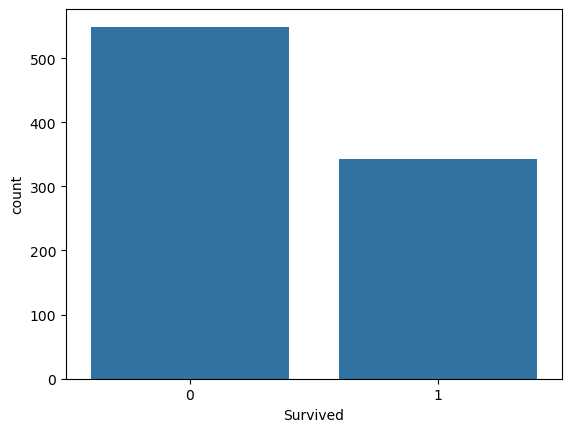

In [390]:
sns.countplot(x="Survived",data=data)

In [391]:
data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

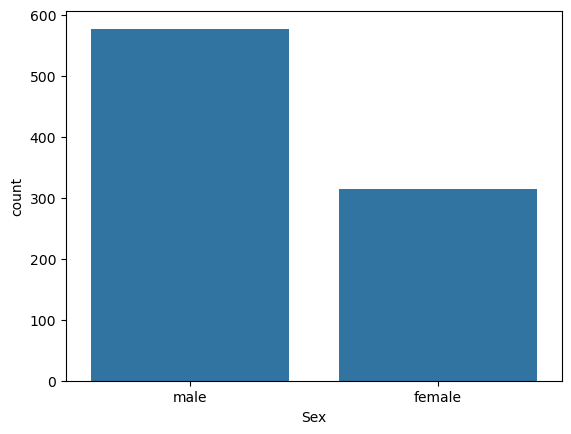

In [392]:
sns.countplot(x="Sex",data=data)

<Axes: xlabel='Survived', ylabel='count'>

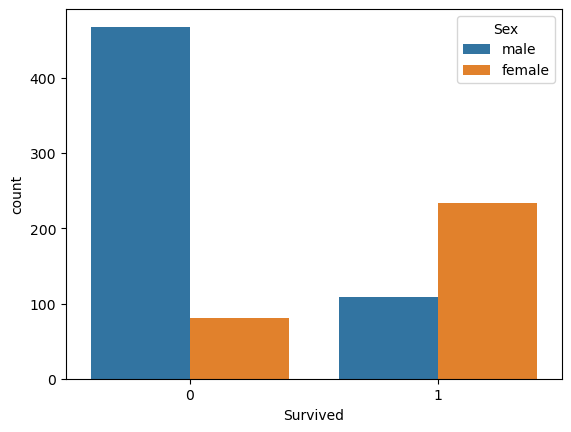

In [393]:
sns.countplot(x="Survived",hue="Sex",data=data)

In [394]:
data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

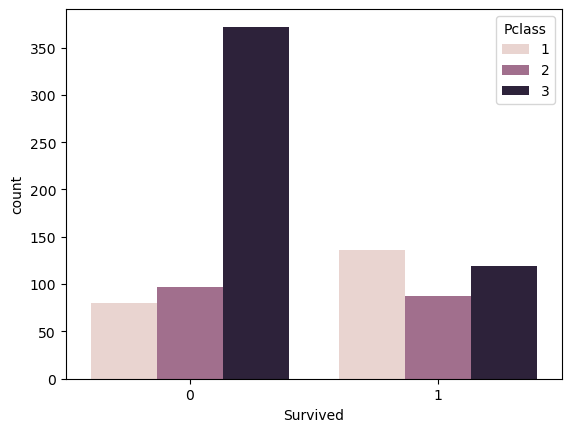

In [395]:
sns.countplot(x="Survived" , hue="Pclass" , data=data)

<Axes: xlabel='Age', ylabel='Count'>

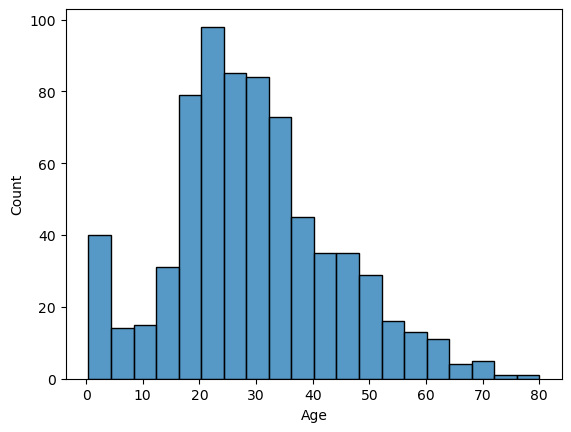

In [396]:
sns.histplot(x="Age" , data=data)

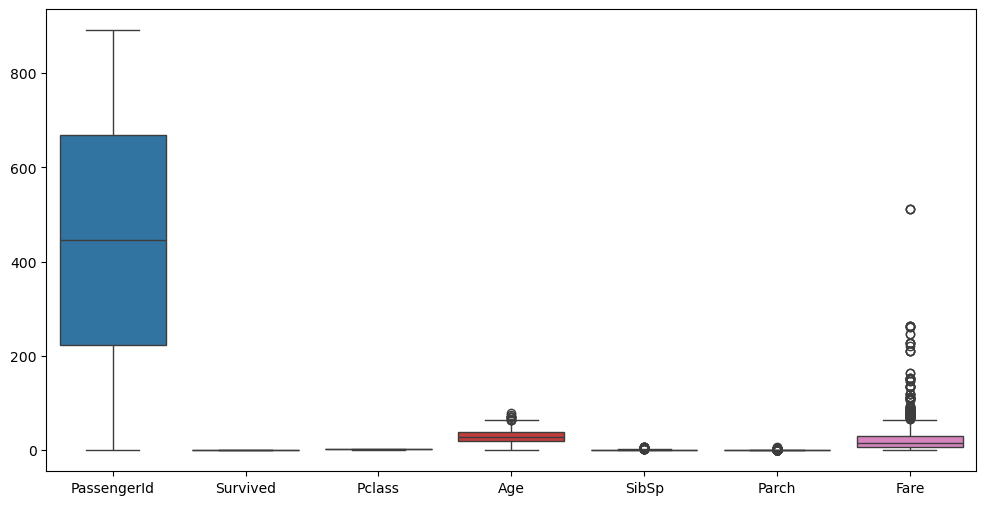

In [397]:
plt.figure(figsize=(12,6))
sns.boxplot(data)
plt.show()

In [398]:
#print(data.corr()["Price"].sort_values())

# 5.Preprocessing

# Handle Null values

In [399]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

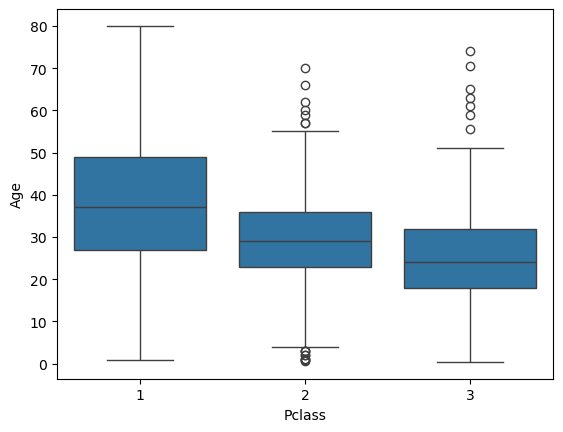

In [400]:
sns.boxplot(x="Pclass",y="Age",data=data)

In [401]:
def impute_nulls_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
             return 29
        else:
            return 24
        

    else:
        return Age

In [402]:
data['Age']=data[['Age','Pclass']].apply(impute_nulls_age,axis = 1)

C:\Users\24SRV\AppData\Local\Temp\ipykernel_17316\1013858363.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
C:\Users\24SRV\AppData\Local\Temp\ipykernel_17316\1013858363.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


In [403]:
data["Age"].isna().sum()

0

In [404]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [405]:
data.drop(columns=["Cabin"] , axis=1, inplace=True)

In [406]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [407]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

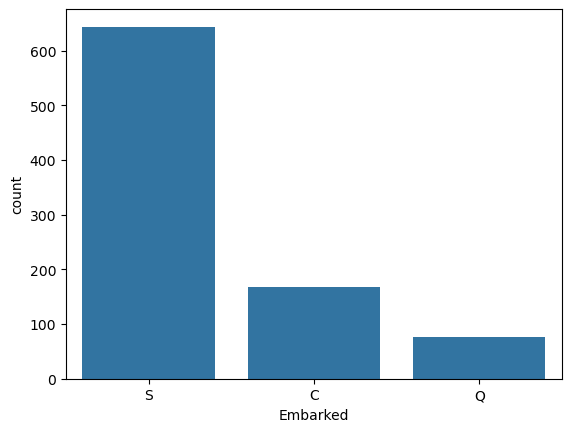

In [408]:
sns.countplot(x= 'Embarked',data=data)

In [409]:
data["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [410]:
data["Embarked"].mode()[0]

'S'

In [411]:
data["Embarked"].fillna(data["Embarked"].mode()[0],inplace = True)

C:\Users\24SRV\AppData\Local\Temp\ipykernel_17316\2004072386.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Embarked"].fillna(data["Embarked"].mode()[0],inplace = True)


In [412]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Drop irrelevant columns

In [413]:
data.drop(columns=["PassengerId" , "Name" , "Ticket"] , axis=1,inplace=True)

# Transformation for categorical features

In [414]:
encoder=LabelEncoder()
data["Sex"]=encoder.fit_transform(data["Sex"])
data["Embarked"]=encoder.fit_transform(data["Embarked"])

In [415]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Outlier Detection & Removal

<Axes: >

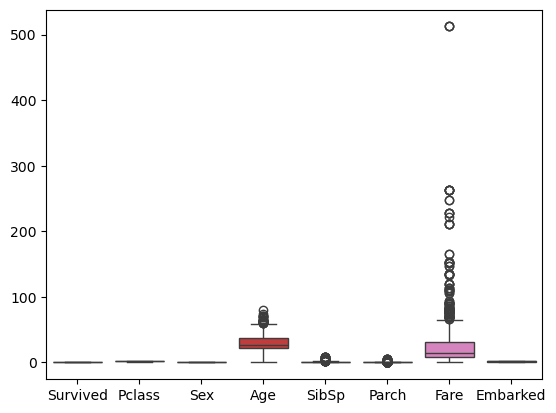

In [416]:
sns.boxplot(data)

In [417]:
outlier_column=[]
for col in data.columns:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    Threshold=1.5
    lower=Q1-IQR*Threshold
    upper=Q3+IQR*Threshold
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    if not outliers.empty:
        outlier_column.append(col)
print("Columns with outliers:" , outlier_column)

Columns with outliers: ['Age', 'SibSp', 'Parch', 'Fare']


In [419]:
for col in outlier_column:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    data[col] = np.where(data[col] < lower, lower, data[col])
    data[col] = np.where(data[col] > upper, upper, data[col])


<Axes: >

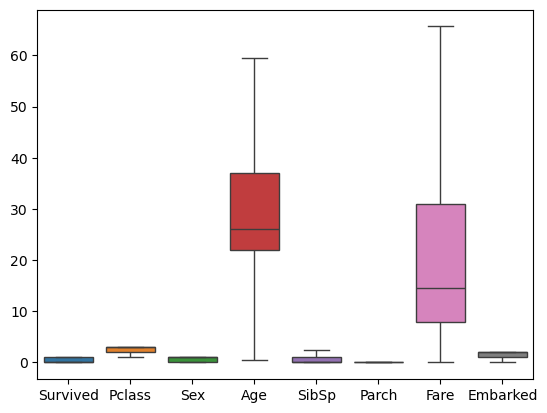

In [420]:
sns.boxplot(data)

# 6. Split data

In [421]:
## split the data into Features (x), labels (y)
feature=data.drop(columns=["Survived"] , axis=1)
target=data["Survived"]

In [422]:
x_train,x_test,y_train,y_test =train_test_split(feature,target,test_size = 0.2,random_state=0,shuffle=True)

In [423]:
def checkShape(Xtrain,Xtest,Ytrain,Ytest):
    print("Xtrain shape is :", Xtrain.shape)
    print("Xtest shape is :", Xtest.shape)
    print("--"*30)
    print("Ytrain shape is :", Ytrain.shape)
    print("Ytest shape is :", Ytest.shape)

In [424]:
checkShape(x_train,x_test,y_train,y_test)

Xtrain shape is : (712, 7)
Xtest shape is : (179, 7)
------------------------------------------------------------
Ytrain shape is : (712,)
Ytest shape is : (179,)


# 7.Scalling

In [425]:
scaler=StandardScaler()
xtrain_scaled=scaler.fit_transform(x_train)
xtest_scaled=scaler.transform(x_test)

# 8. Model Training

In [426]:
logistic_model=LogisticRegression()
logistic_model.fit(xtrain_scaled,y_train)

LogisticRegression()

# 9.Prediction & Evaluation

In [427]:
y_predict=logistic_model.predict(xtest_scaled)

In [428]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [429]:
print("The accuracy of this model is : " , accuracy_score(y_test,y_predict))

The accuracy of this model is :  0.7988826815642458


In [430]:
y_test.values

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [431]:
xtest_scaled

array([[ 0.81925059,  0.72882288, -0.38274625, ...,  0.        ,
        -0.46824751, -1.98156574],
       [ 0.81925059,  0.72882288, -0.38274625, ...,  0.        ,
        -0.80753105,  0.5790056 ],
       [ 0.81925059,  0.72882288, -1.70752769, ...,  0.        ,
         0.25207007, -0.70128007],
       ...,
       [-1.58118735, -1.37207547,  0.16275198, ...,  0.        ,
         2.04513618, -1.98156574],
       [ 0.81925059,  0.72882288, -0.46067457, ...,  0.        ,
        -0.79259104,  0.5790056 ],
       [ 0.81925059,  0.72882288, -0.77238785, ...,  0.        ,
        -0.78297482,  0.5790056 ]])

In [432]:
logistic_model.predict([[0.66945954, -1.70719944, -0.23453936, -0.42873709,  0. ,-0.56425467,  0.55587065]])

array([1], dtype=int64)

In [433]:
logistic_model.predict([[ 0.66945954, -1.70719944, -0.54072186, -0.42873709,  0.        ,
        -0.54395998, -0.81288611]])

array([1], dtype=int64)

In [434]:
logistic_model.predict([ [-2.06815178,  0.58575465,  2.62316396, -0.42873709,  0.        ,
         1.59175835,  0.55587065]])

array([0], dtype=int64)

In [435]:
y_predict

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)